In [14]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("LG_G4_C20_all_out.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [15]:
data

['t_n55          8.0039 ( 7.6056,  8.3141) ( 7.6580,  8.3326)  0.6746 (Jnode 106)\n',
 't_n56          7.6791 ( 7.4229,  7.9640) ( 7.4070,  7.9447)  0.5377 (Jnode 105)\n',
 't_n57          7.1369 ( 6.9813,  7.3088) ( 6.9737,  7.2995)  0.3258 (Jnode 104)\n',
 't_n58          6.6430 ( 6.5532,  6.7401) ( 6.5506,  6.7365)  0.1859 (Jnode 103)\n',
 't_n59          6.4341 ( 6.3451,  6.5325) ( 6.3434,  6.5302)  0.1868 (Jnode 102)\n',
 't_n60          6.1873 ( 6.0632,  6.3094) ( 6.0691,  6.3147)  0.2455 (Jnode 101)\n',
 't_n61          5.8707 ( 5.7154,  6.0235) ( 5.7189,  6.0265)  0.3076 (Jnode 100)\n',
 't_n62          3.2568 ( 2.6917,  3.6809) ( 2.7384,  3.7217)  0.9833 (Jnode 99)\n',
 't_n63          4.9405 ( 4.7860,  5.1098) ( 4.7825,  5.1059)  0.3234 (Jnode 98)\n',
 't_n64          4.4057 ( 4.3385,  4.4913) ( 4.3319,  4.4814)  0.1494 (Jnode 97)\n',
 't_n65          4.2234 ( 4.2071,  4.2685) ( 4.2061,  4.2572)  0.0511 (Jnode 96)\n',
 't_n66          3.4945 ( 3.4485,  3.5174) ( 3.4558,  3.52

In [16]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [17]:
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
    lower_ci_iqtree.append(float(line[3][:-1]))
    upper_ci_iqtree.append(float(line[4][:-1]))
    # posterior_mean_baseml.append(float(line[4]))
    # lower_ci_baseml.append(float(line[5]))
    # upper_ci_baseml.append(float(line[6]))
    
for line in mu_data:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_mu_iqtree.append(float(line[1]))
    lower_ci_mu_iqtree.append(float(line[3][:-1]))
    upper_ci_mu_iqtree.append(float(line[4][:-1]))
    
for line in var_data:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_var_iqtree.append(float(line[1]))
    lower_ci_var_iqtree.append(float(line[3][:-1]))
    upper_ci_var_iqtree.append(float(line[4][:-1]))

In [18]:
node_name

['t_n55',
 't_n56',
 't_n57',
 't_n58',
 't_n59',
 't_n60',
 't_n61',
 't_n62',
 't_n63',
 't_n64',
 't_n65',
 't_n66',
 't_n67',
 't_n68',
 't_n69',
 't_n70',
 't_n71',
 't_n72',
 't_n73',
 't_n74',
 't_n75',
 't_n76',
 't_n77',
 't_n78',
 't_n79',
 't_n80',
 't_n81',
 't_n82',
 't_n83',
 't_n84',
 't_n85',
 't_n86',
 't_n87',
 't_n88',
 't_n89',
 't_n90',
 't_n91',
 't_n92',
 't_n93',
 't_n94',
 't_n95',
 't_n96',
 't_n97',
 't_n98',
 't_n99',
 't_n100',
 't_n101',
 't_n102',
 't_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107']

In [19]:
posterior_mean_iqtree

[8.0039,
 7.6791,
 7.1369,
 6.643,
 6.4341,
 6.1873,
 5.8707,
 3.2568,
 4.9405,
 4.4057,
 4.2234,
 3.4945,
 3.1946,
 1.7145,
 0.6333,
 3.8603,
 6.2769,
 5.9667,
 5.8753,
 4.2031,
 3.778,
 5.0699,
 6.3634,
 6.1515,
 5.9794,
 5.7403,
 5.4624,
 5.3217,
 5.1531,
 4.9958,
 4.5889,
 3.5005,
 3.2383,
 5.0176,
 4.2619,
 6.2553,
 1.778,
 6.1302,
 5.8458,
 5.4791,
 5.3112,
 3.7902,
 4.7482,
 4.969,
 4.7797,
 4.4191,
 3.3356,
 4.5479,
 6.1689,
 3.7961,
 2.1653,
 2.5247,
 5.1901]

In [20]:
lower_ci_iqtree

[7.6056,
 7.4229,
 6.9813,
 6.5532,
 6.3451,
 6.0632,
 5.7154,
 2.6917,
 4.786,
 4.3385,
 4.2071,
 3.4485,
 3.1802,
 1.6503,
 0.6151,
 3.5984,
 6.1705,
 5.7592,
 5.7349,
 3.5697,
 3.1878,
 5.0441,
 6.2934,
 6.0647,
 5.8823,
 5.6504,
 5.4047,
 5.302,
 5.1403,
 4.9898,
 4.3829,
 3.2865,
 3.0621,
 4.9761,
 4.1624,
 6.1715,
 1.3239,
 6.0403,
 5.7578,
 5.4463,
 5.3001,
 3.2027,
 4.7025,
 4.7737,
 4.5425,
 4.1593,
 2.852,
 4.1266,
 5.8259,
 3.1869,
 1.7012,
 1.9449,
 4.2248]

In [21]:
upper_ci_iqtree

[8.3141,
 7.964,
 7.3088,
 6.7401,
 6.5325,
 6.3094,
 6.0235,
 3.6809,
 5.1098,
 4.4913,
 4.2685,
 3.5174,
 3.2311,
 1.8946,
 0.6829,
 4.232,
 6.3743,
 6.1778,
 6.012,
 4.7513,
 4.3541,
 5.1377,
 6.4367,
 6.2417,
 6.0785,
 5.8354,
 5.5321,
 5.3533,
 5.1788,
 5.0112,
 4.746,
 3.782,
 3.5299,
 5.1085,
 4.4555,
 6.3383,
 2.2054,
 6.2159,
 5.9373,
 5.4992,
 5.3376,
 4.3464,
 4.8502,
 5.2392,
 5.056,
 4.7536,
 3.7556,
 5.0214,
 6.3748,
 4.524,
 2.8664,
 3.2842,
 6.2184]

In [22]:
file_LG = open("LG_all_out.txt", "r")
lines1 = file_LG.readlines()
file_LG.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
    lower_ci_baseml.append(float(line[3][:-1]))
    upper_ci_baseml.append(float(line[4][:-1]))
    
for line in mu_data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_mu_baseml.append(float(line[1]))
    lower_ci_mu_baseml.append(float(line[3][:-1]))
    upper_ci_mu_baseml.append(float(line[4][:-1]))
    
for line in var_data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_var_baseml.append(float(line[1]))
    lower_ci_var_baseml.append(float(line[3][:-1]))
    upper_ci_var_baseml.append(float(line[4][:-1]))

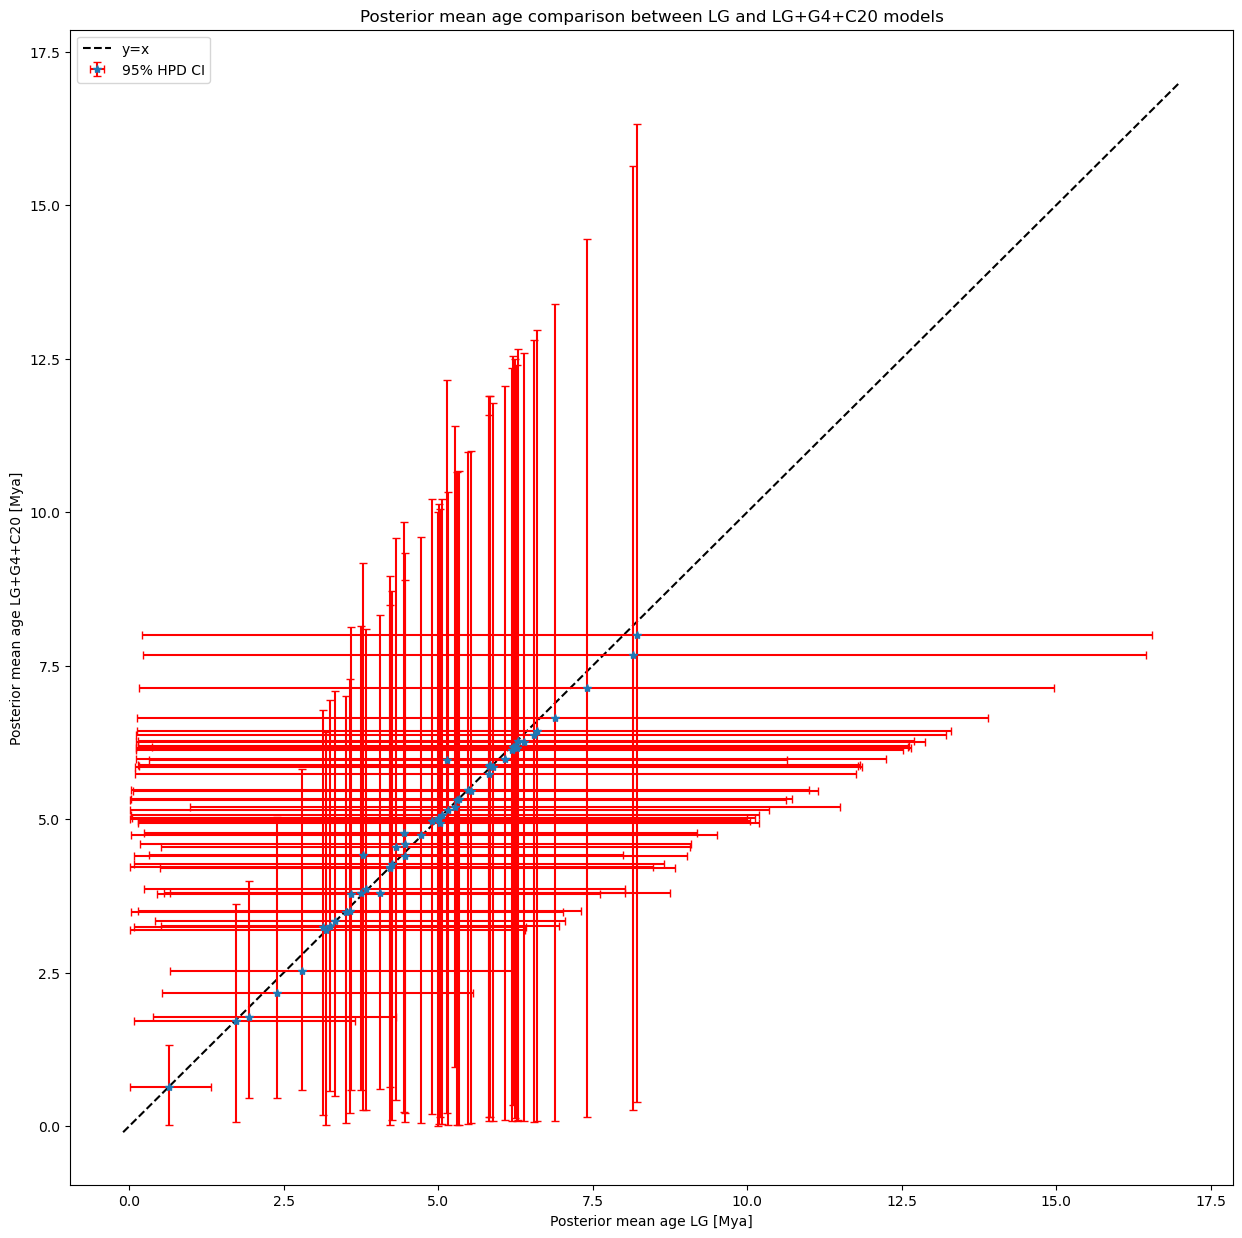

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# # Example data
# # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# 
# # Credible intervals for MCMCtree
# lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# 
# # Credible intervals for McmcDate
# lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]

# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(15, 15))
ax.plot([-0.1,17], 
        [-0.1, 17], 
        'k--', label='y=x')
ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
            xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')

# Labels and title
ax.set_xlabel('Posterior mean age LG [Mya]')
ax.set_ylabel('Posterior mean age LG+G4+C20 [Mya]')
ax.set_title('Posterior mean age comparison between LG and LG+G4+C20 models')
ax.legend()

# Show plot
# plt.show()
plt.savefig('./metazoa_posterior_mean_age_comparison_LG_G4_C20.png')

In [24]:
posterior_mean_baseml

[8.2224,
 8.1524,
 7.4044,
 6.8937,
 6.5909,
 6.2488,
 5.8214,
 3.2549,
 5.0197,
 4.4689,
 4.221,
 3.5,
 3.1903,
 1.727,
 0.6345,
 3.8303,
 6.2925,
 5.1454,
 5.8402,
 4.2228,
 3.594,
 5.0662,
 6.5557,
 6.2734,
 6.0718,
 5.8268,
 5.5345,
 5.3361,
 5.158,
 4.994,
 4.4682,
 3.572,
 3.1273,
 5.019,
 4.2434,
 6.3827,
 1.9353,
 6.2001,
 5.8811,
 5.4869,
 5.3069,
 3.7469,
 4.7264,
 4.9017,
 4.4422,
 3.7769,
 3.3239,
 4.313,
 6.206,
 4.0587,
 2.3943,
 2.7985,
 5.273]

In [25]:
posterior_mean_iqtree

[8.0039,
 7.6791,
 7.1369,
 6.643,
 6.4341,
 6.1873,
 5.8707,
 3.2568,
 4.9405,
 4.4057,
 4.2234,
 3.4945,
 3.1946,
 1.7145,
 0.6333,
 3.8603,
 6.2769,
 5.9667,
 5.8753,
 4.2031,
 3.778,
 5.0699,
 6.3634,
 6.1515,
 5.9794,
 5.7403,
 5.4624,
 5.3217,
 5.1531,
 4.9958,
 4.5889,
 3.5005,
 3.2383,
 5.0176,
 4.2619,
 6.2553,
 1.778,
 6.1302,
 5.8458,
 5.4791,
 5.3112,
 3.7902,
 4.7482,
 4.969,
 4.7797,
 4.4191,
 3.3356,
 4.5479,
 6.1689,
 3.7961,
 2.1653,
 2.5247,
 5.1901]

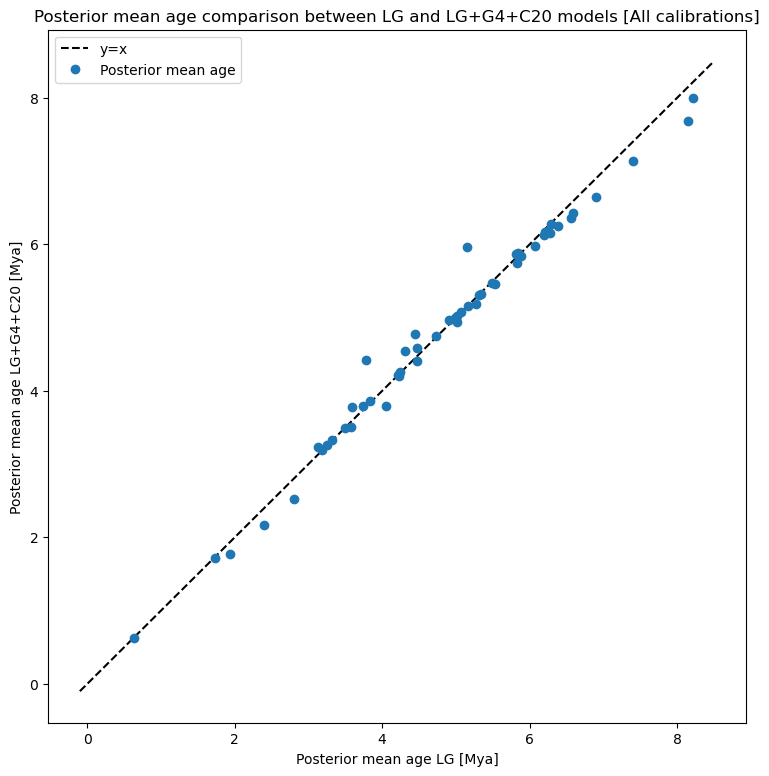

In [26]:
# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(9, 9))
ax.plot([-0.1,8.5], 
        [-0.1, 8.5], 
        'k--', label='y=x')
ax.plot(posterior_mean_baseml, posterior_mean_iqtree, 'o', label='Posterior mean age')
 
# Labels and title
ax.set_xlabel('Posterior mean age LG [Mya]')
ax.set_ylabel('Posterior mean age LG+G4+C20 [Mya]')
ax.set_title('Posterior mean age comparison between LG and LG+G4+C20 models [All calibrations]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./metazoa_posterior_mean_age_comparison_LG_G4_C20_scatter.png')